### Project 3: Taylor Series - Polynomial approximation 

### Abstract & Description:
Suppose you have some function that may be expensive or difficult to evaluate and so you’d like to find an easy approximation for that function in some limited domain. One particularly nice way to handle that is with a polynomial approximation since they are easy to compute. The question is: How can we find such a polynomial? One easy answer is called the "Taylor Series" set up like so:

$$f(x) = A + B(x-x_0) + C(x-x_0)^2 + D(x-x_0)^3 + \cdots$$

$x_0$ is the point around which we are interested in finding an approximation.
#### Morse Potential

Let's use this technique to analyze the motion of nitrogen atoms in a nitrogen molecule. The atoms live in an attractive potential of the form:

$$U(x) = U_m \left( \left(1-e^{-\alpha(x-x_0)}\right)^2 - 1\right)$$

### Algorithm & Discussion

In this project, we will neglect all anharmonic Terms. It turned out that the third polynomial with a power of 3 is anti-symmetric, which means it is positive on one side and negative of the other side of the desired $x_0$, which is also the minimum. For such a case, we can neglect all the polynomial with a power greater than 2. The error should be very acceptable even in the microscopic scale. 
When $x$ = $x_0$, the polynomial becomes:

$$f(x) = A + B(x_0-x_0) + C(x_0-x_0)^2 + D(x_0-x_0)^3 + \cdots$$


$x_0 - x_0$ in the expression above is nothing but $0$ so all but the first term go to zero and we just get:

$$f(x_0) = A$$
We have our first coefficient, $A=f(x_0)$, so $A$ is simply equal to the value of the function at the point of interest.

What about $B$, $C$, and all the rest? Let’s demand that the first derivative of $f(x)$ match the first derivative of the series and see what we discover. What is the first derivative of the series?

$$f'(x) = 0 + B + 2C(x-x_0) + 3D(x-x_0)^2 + \cdots $$
Now, put $x \rightarrow x_0$ and see what we get:

$$f'(x_0) = 0 + B + 0 + \cdots $$
so $B = f'(x_0)$, see how easy this is!

Now try the second derivative:

$$f''(x) = 0 + 0 + 2C + 6D(x-x_0) + \cdots $$
putting $x \rightarrow x_0$ and we see:

$$f''(x_0) = 2C$$
so $C=f''(x_0)/2$. If you carry this on for a bit you can see you get:

$$f(x) \approx f(x_0) + f'(x_0)(x-x_0) + \frac{1}{2}f''(x_0)(x-x_0)^2 + \cdots$$
or more generally:

$$f(x) = \sum_{n=0}^{n=\infty} \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n$$

##### Procedure
We will use the Heun Method to compute the period of small oscillations about the equilibrium position and compare that to the experimental data and the Taylor Series result.

$U_m$ = 7.37 eV

$x_0$ = 1.2 A

$\alpha = 2.287\ A^{-1}$  

$1A = 10^{-10}m$

$m = 1.16x10^-26 kgs$ 

$f$ = $5.19\times 10^{13}$ Hz


* We will use sympy/Taylor series to estimate the low-amplitude frequency of the system*

* We will use a numerical method (Heun Algorithm for our case) to compute the time evolution (frequency) of the system 

### Code & Results

In [99]:
%pylab inline
v = 0
x = 1.19e-10
x_0 = 1.2e-10
Um = 7.37 *1.6e-19 #eV          #Implementation of experiment data
alpha = 2.2871e10 #1/A
m = 7*1.66054e-27
k = 2*Um*(alpha**2)
f = (1/(2*math.pi))*(math.sqrt((2*Um*alpha**2)/m))
print("The frequency = (Hz)",'%.2e' % f)


Populating the interactive namespace from numpy and matplotlib
The frequency = (Hz) 5.18e+13


The frequency we obtained is what we exactly expected. Now, we will use the Heun method to estimate the frequency in order to validate or confirm our predictions.

* In order to study how the amplitude of the periodic wave behaves, how the period changes, we have to change how far we are from the origin. Therefore, by changing x, we are capable of examining the periodic wave with different amplitudes.

We will use 3 different x.

* x1 = 1.19e-10  in green
* x2 = 1.3e-10   in red 
* x3 = 1.4e-10    in blue


Populating the interactive namespace from numpy and matplotlib
|| By inspection, we can clearly see that the period is roughly of 0.2e-13s


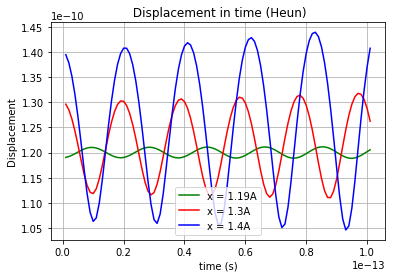

In [102]:
%pylab inline
i=1                          
x = 1.19e-10
while i<=3:        #3 iterations for 3 different graphs
    color = 'g-'
    if i == 2:
        x = 1.3e-10
        color = 'red'
    if i == 3:
        color ='b'
        x = 1.4e-10
    v =0
    t = 0
    dt =1e-15
    s = array([x,v])   #Initializing the state

    def deriv(s,v):
        x = s[0]
        v = s[1]
        dxdt = v
        dvdt = (-2*Um*alpha*(1-exp(-alpha*(x-x_0)))*exp(-alpha*(x-x_0)))/m
        return array([dxdt,dvdt])    #returns the derivatives

    def HeunStep (s,t,deriv,dt):   #Heun method implementation
        f1 = deriv(s,t)        
        f2 = deriv(s+f1*dt,t+dt)
        return (0.5*(f1+f2)*dt)+s 

    ylist=[]
    xlist=[]
    while t<10e-14:
        s = HeunStep(s,t,deriv,dt)  #Iterations for Heun Method 
        t +=dt;
        xlist.append(t)
        ylist.append(s[0])

    grid()
    plot(xlist,ylist,color)
    i +=1
print("===================================")    
print("|| By inspection, we can clearly see that the period is roughly of 0.2e-13s")
print("===================================")    
xlabel("time (s)")
ylabel("Displacement")
title(" Displacement in time (Heun)")
legend(['x = 1.19A','x = 1.3A','x = 1.4A'],loc=8)

Let's compare our 2 solutions: 

The analytical solution gave us a frequency of 5.18e+13 Hz and with the numerical method we obtained a period of 0.2e-13

The relationship between frequency and period is the following:
$$ f = 1/T $$

Therefore, we can express our analytical frequency in term of seconds. It will be: $ \frac{1}{5.18e13 Hz} =$ 0.2e-14 s 

Hence, this comes to validate our predictions.

But as we can observe above on the graph, the 3 curves are not really in phase. There is a slight difference in time for every period of each of the 3 curves even though it is very hard to state so by just inspecting due to microscopic scale we are working on.

### CONCLUSION

As observed throughout the experiment, the intial displacement is what defines the amplitude of the periodic wave. However, it changes the period of the vibrating molecule. That makes sense because a larger displacement should take more time to complete a back-and-forth movement than a smaller displacement. In our case, though we even doubled the value of x, the period is not significantly changing due to the the small difference in displacement. Therefore, we can roughly estimate the value of the period and frequency to be:
 
T = 0.2e-13 s
F = 5.18e+13 Hz